<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preparation</a></span><ul class="toc-item"><li><span><a href="#Install-/-Load-Packages" data-toc-modified-id="Install-/-Load-Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Install / Load Packages</a></span></li><li><span><a href="#Website-links" data-toc-modified-id="Website-links-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Website links</a></span></li></ul></li><li><span><a href="#Qubits-and-Quantum-Circuits" data-toc-modified-id="Qubits-and-Quantum-Circuits-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Qubits and Quantum Circuits</a></span><ul class="toc-item"><li><span><a href="#Preparing-qubits" data-toc-modified-id="Preparing-qubits-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparing qubits</a></span></li><li><span><a href="#Building-Quantum-Circuits" data-toc-modified-id="Building-Quantum-Circuits-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Building Quantum Circuits</a></span></li><li><span><a href="#Results-of-the-quantum-circuit:-connecting-to-IMB-Q-simulators" data-toc-modified-id="Results-of-the-quantum-circuit:-connecting-to-IMB-Q-simulators-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results of the quantum circuit: connecting to IMB Q simulators</a></span></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Exercise 3</a></span></li><li><span><a href="#Connecting-to-IMB-Q-device-(cloud-quantum-computer)" data-toc-modified-id="Connecting-to-IMB-Q-device-(cloud-quantum-computer)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Connecting to IMB Q device (cloud quantum computer)</a></span><ul class="toc-item"><li><span><a href="#Experimenting-with-the-real-quantum-device" data-toc-modified-id="Experimenting-with-the-real-quantum-device-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Experimenting with the real quantum device</a></span></li></ul></li></ul></li></ul></div>

# Preparation

## Install / Load Packages
- We need to install or load packages before running the code below.

In [1]:
# Install packages

#!pip install numpy
#!pip install qiskit
#!pip install qiskit[visualization]

In [2]:
# Load packages
## General tools
import numpy as np
import matplotlib.pyplot as plt
from math import pi

## Qiskit Circuit Functions
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import *

## Website links
- Here are some website links related to IBM Quantum and 
    - [IBM.com/quantum](https://www.ibm.com/quantum) 
    - [IBM Quantum computing](https://quantum-computing.ibm.com/)
    - [Qiskit Textbook](https://qiskit.org/textbook/ch-states/introduction.html)
    - [Install Qiskit](https://qiskit.org/documentation/stable/0.24/install.html)

# Qubits and Quantum Circuits
- Here are some useful links where you can learn the list of quanum gates and how they are operated.
    - [Qiskit: Summary of Quantum Operations](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
    - [wikipedia - 'Quantum Logic Gate'](https://en.wikipedia.org/wiki/Quantum_logic_gate)

## Preparing qubits
- Qubits and Bits
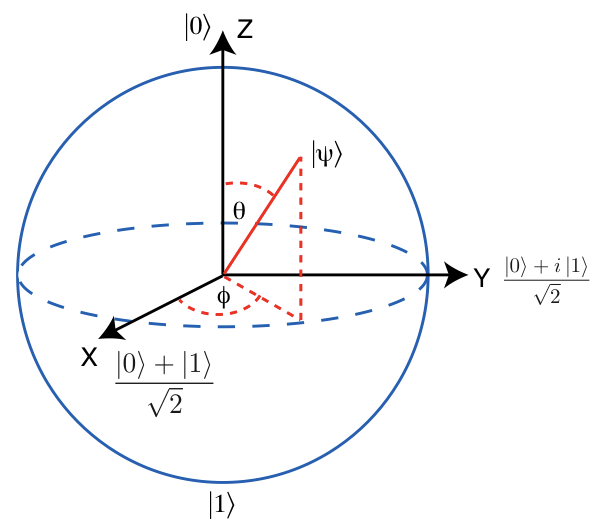

In [3]:
# Create a quantum register with 3 qubits
q = QuantumRegister(size = 2, name = 'q')
# Create a classical register with 3 bits
c = ClassicalRegister(size = 2, name = 'c')

# Build a quantum circuit
qc = QuantumCircuit(q, c, name = "first_qc")
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

## Building Quantum Circuits
- A single qubit gates
- Measurements expectation of an observable
- The list of single qubit gates

In [4]:
# Build a quantum circuit
qc = QuantumCircuit(q,c, name = "first_qc")
## Add a Hadamard gate on the first(0th) qubit
qc.h(qubit = 0)
## Add a CX(CNOT) gate with control qubit on 0th qubit and target qubit on 1st qubit
qc.cx(control_qubit = 0, target_qubit = 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [5]:
# Build a measurement part of the quantum circuit
meas_qc = QuantumCircuit(q, c, name = 'first_qc_meas')
## Add a barrier m
meas_qc.barrier()
meas_qc.measure(q, c)
meas_qc.draw()

░ ┌─┐   
q_0: ─░─┤M├───
      ░ └╥┘┌─┐
q_1: ─░──╫─┤M├
      ░  ║ └╥┘
c: 2/════╩══╩═
         0  1

- In qiskit, two quantum circuits can be connected(added) with '+' operations

In [6]:
# Add two pre-defined quantum circuits
qc_all = qc + meas_qc
qc_all.draw()

C:\Users\THK\AppData\Local\Temp\ipykernel_4640\1219276596.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc_all = qc + meas_qc


┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

In [7]:
# Add two pre-defined quantum circuits using 'compose'
qc_all2 = qc.compose(meas_qc)
qc_all2.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

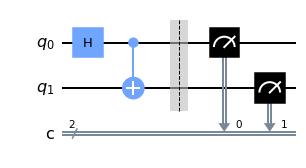

In [8]:
# Draw the quantum circuit in a different style
qc_all.draw(output='mpl')

## Results of the quantum circuit: connecting to IMB Q simulators
- Let's get the measurement results by connecting to simulators

In [9]:
# Use Aer's qasm_simulators
backend_q = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the qasm simulator
job_sim1 = execute(qc_all, backend_q, shots=2048)

In [10]:
job_sim1.status()

<JobStatus.DONE: 'job has successfully run'>

- Job result: Frequencies (counts)

In [11]:
# Get the results from the job
result_sim1 = job_sim1.result()
result_sim1

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='a9290914-7752-472a-9c6d-781c37b1dbe7', job_id='6c7009c9-cc79-43b8-a7af-5e8b79278e68', success=True, results=[ExperimentResult(shots=2048, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 1038, '0x0': 1010}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-3', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2951630774, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.0060094)], date=2022-07-14T09:20:24.806318, status=COMPLETED, status=QobjHeader(back

In [12]:
result_sim1.get_counts(qc_all)

{'11': 1038, '00': 1010}

- Job result: Histogram

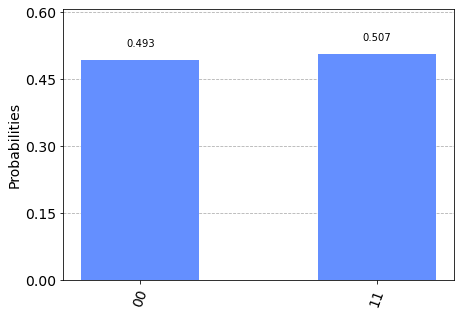

In [13]:
# Plot a histogram of the result
plot_histogram(result_sim1.get_counts(qc_all))

- <U>**Notice**</U>: In classical bits, the digits are ordered from right to left. To follow the same rule, the qiskit orders qubits from right to left as well. In other quantum textbooks, the qubit digit order may be from left to right.

- Job result: Output state as a vector

In [14]:
# Use Aer's statevector_simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute the circuit on the statevector simulator
# It is important to note that the measurement has been excluded.
job_sim2 = execute(qc, backend_sv)

In [15]:
# Get the results from the job
result_sim2 = job_sim2.result()
result_sim2

Result(backend_name='statevector_simulator', backend_version='0.10.4', qobj_id='3a4404c7-1fa9-4f48-ae53-eb3681ad91b6', job_id='fe9e0316-ee24-4100-a21f-3e6c3f9d4acb', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1}, statevector=Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='first_qc', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2783104441, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {

In [16]:
# See the output state as a vector
output_state = result_sim2.get_statevector(qc, decimals=4)
print(output_state)

Statevector([0.7071+0.j, 0.    +0.j, 0.    +0.j, 0.7071+0.j],
            dims=(2, 2))


In [17]:
# Display the output state as a vector
display(array_to_latex(output_state, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

- Job result: Visualize density matrix

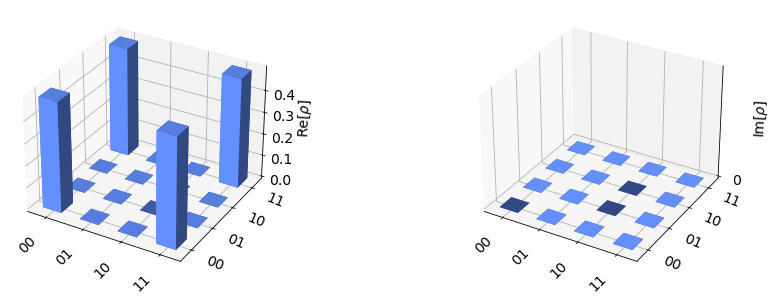

In [18]:
plot_state_city(output_state)

- Job result: Bloch Sphere
    - Let's plot a basic qubit state applied with $X, Z$, and $H$ gates.

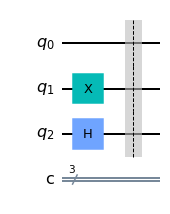

In [19]:
# Execute the circuit on the statevector simulator
# It is important to note that the measurement has been excluded.
qc_3 = QuantumCircuit(3, 3, name = "qc_bloch")
qc_3.x(qubit = 1)
qc_3.h(qubit = 2)
qc_3.barrier()
qc_3.draw(output = 'mpl')

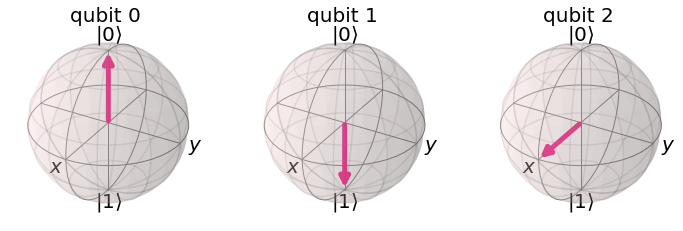

In [20]:
# Execute the circuit on the statevector simulator
# It is important to note that the measurement has been excluded.
job_sim_bloch = execute(qc_3, backend_sv)

# Get the results from the job
result_sim_bloch = job_sim_bloch.result()

# See the output state as a vector
output_bloch = result_sim_bloch.get_statevector(qc_3, decimals=5)

# Draw the qubit state on the bloch sphere
plot_bloch_multivector(output_bloch)

- Job result: Unitary Matrix

In [21]:
# Use Aer's statevector_simulator
backend_u = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator
job_usim = execute(qc_3, backend_u)

# Get the results from the job
result_usim = job_usim.result()
result_usim

Result(backend_name='unitary_simulator', backend_version='0.10.4', qobj_id='b7a975e7-3510-4f29-80a1-b2edb416f3ba', job_id='5d00bfaa-0c3c-414a-abd2-db957a1938f7', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1}, unitary=Operator([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678-8.65956056e-17j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.70710678+0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70

In [22]:
# Output the unitary matrix
unitary = result_usim.get_unitary(qc_3, decimals=5)
print('%s\n' % unitary)

Operator([[ 0.     +0.j,  0.     +0.j,  0.70711+0.j,  0.     +0.j,
            0.     +0.j,  0.     +0.j,  0.70711-0.j,  0.     +0.j],
          [ 0.     +0.j,  0.     +0.j,  0.     +0.j,  0.70711+0.j,
            0.     +0.j,  0.     +0.j,  0.     +0.j,  0.70711-0.j],
          [ 0.70711+0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
            0.70711-0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j],
          [ 0.     +0.j,  0.70711+0.j,  0.     +0.j,  0.     +0.j,
            0.     +0.j,  0.70711-0.j,  0.     +0.j,  0.     +0.j],
          [ 0.     +0.j,  0.     +0.j,  0.70711+0.j,  0.     +0.j,
            0.     +0.j,  0.     +0.j, -0.70711+0.j,  0.     +0.j],
          [ 0.     +0.j,  0.     +0.j,  0.     +0.j,  0.70711+0.j,
            0.     +0.j,  0.     +0.j,  0.     +0.j, -0.70711+0.j],
          [ 0.70711+0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
           -0.70711+0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j],
          [ 0.     +0.j,  0.70711+0.j,  0.     +0.j,  0

## Exercise 1
- Design quantum circuits to create the following 1-qubit states. See the results by drawing the Bloch sphere.

 1) $|+\rangle = \frac{1}{\sqrt{2}}{\bigl(|0\rangle+|1\rangle\bigl)}$

 2) $|-\rangle = \frac{1}{\sqrt{2}}{\bigl(|0\rangle-|1\rangle\bigl)}$
 
 3) $|+i\rangle = \frac{1}{\sqrt{2}}{\bigl(|0\rangle+i|1\rangle\bigl)}$
 
 4) $|-i\rangle = \frac{1}{\sqrt{2}}{\bigl(|0\rangle-i|1\rangle\bigl)}$

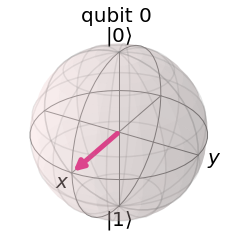

In [23]:
# Exercise 1.1)
def qc_ex1_1():
    qc = QuantumCircuit(1)
    ## FILL YOUR CODE IN HERE ##
    qc.h(0)
    
    ## ---------------------- ##
    return(qc)

state_ex1_1 = Statevector.from_instruction(qc_ex1_1())
plot_bloch_multivector(state_ex1_1)

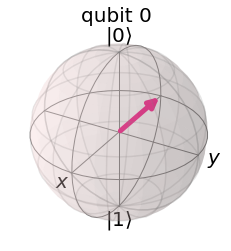

In [24]:
# Exercise 1.2)
def qc_ex1_2():
    qc = QuantumCircuit(1)
    ## FILL YOUR CODE IN HERE ##
    qc.x(0)
    qc.h(0)
    
    ## ---------------------- ##
    return(qc)

state_ex1_2 = Statevector.from_instruction(qc_ex1_2())
plot_bloch_multivector(state_ex1_2)

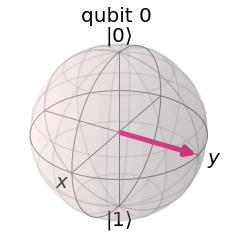

In [25]:
# Exercise 1.3)
def qc_ex1_3():
    qc = QuantumCircuit(1)
    ## FILL YOUR CODE IN HERE ##
    qc.h(0)
    qc.rz(phi = pi/2, qubit = 0)
    
    ## ---------------------- ##
    return(qc)

state_ex1_3 = Statevector.from_instruction(qc_ex1_3())
plot_bloch_multivector(state_ex1_3)

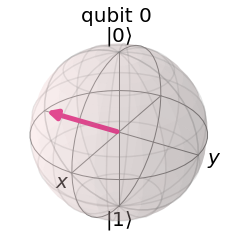

In [26]:
# Exercise 1.4)
def qc_ex1_4():
    qc = QuantumCircuit(1)
    ## FILL YOUR CODE IN HERE.
    qc.rx(theta = pi/2, qubit = 0)
    
    ## ---------------------- ##
    return(qc)

state_ex1_4 = Statevector.from_instruction(qc_ex1_4())
plot_bloch_multivector(state_ex1_4)

## Exercise 2
- Design a quantum circuit to create the following 2-qubit entangled states. Draw your circuit and check your answer with the QASM simulation and by plotting the histogram of the measurement statistics.

 1) $|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}{\bigl(|00\rangle+|11\rangle\bigl)}$

 2) $|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}{\bigl(|01\rangle+|10\rangle\bigl)}$
 
 
- Extra problems: 

 3) $|\Phi^{-}\rangle = \frac{1}{\sqrt{2}}{\bigl(|00\rangle-|11\rangle\bigl)}$

 4) $|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}{\bigl(|01\rangle-|10\rangle\bigl)}$
 


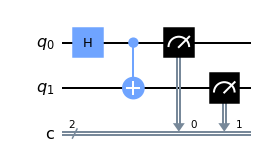

In [27]:
# Exercise 2.1)
def qc_ex2_1():
    qc = QuantumCircuit(2,2)
    ## FILL YOUR CODE IN HERE ##
    qc.h(0)
    qc.cx(0,1)
    qc.measure(qubit = [0,1], cbit = [0,1])
    ## ---------------------- ##
    return(qc)

## Draw the quantum circuit
qc_output = qc_ex2_1()
qc_output.draw(output = 'mpl')

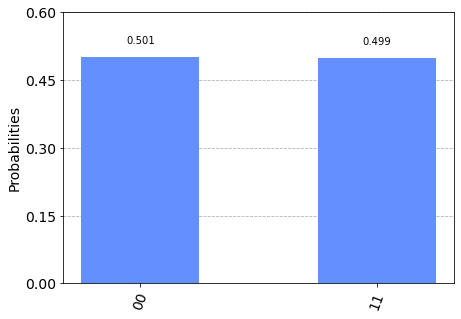

In [28]:
## Plot the histogram of results of the quantum circuit
backend_q = Aer.get_backend('qasm_simulator')
counts_ex2_1 = execute(qc_ex2_1(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex2_1)

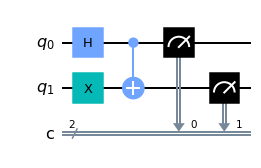

In [29]:
# Exercise 2.2)
def qc_ex2_2():
    qc = QuantumCircuit(2, 2)
    ## FILL YOUR CODE IN HERE ##
    qc.h(0)
    qc.x(1)
    qc.cx(0, 1)
    qc.measure(qubit = [0,1], cbit = [0,1])
    ## ---------------------- ##
    return(qc)

## Draw the quantum circuit
qc_output = qc_ex2_2()
qc_output.draw(output = 'mpl')

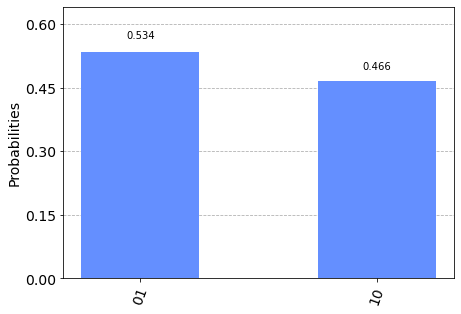

In [30]:
## Plot the histogram of results of the quantum circuit
counts_ex2_2 = execute(qc_ex2_2(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex2_2)

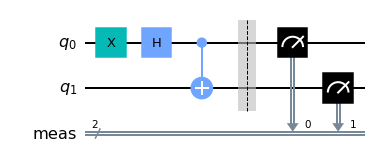

In [31]:
# Exercise 2.3)
def qc_ex2_3():
    qc = QuantumCircuit(2)
    ## FILL YOUR CODE IN HERE ##
    qc.x(0)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure_all()
    ## ---------------------- ##
    return(qc)

## Draw the quantum circuit
qc_output = qc_ex2_3()
qc_output.draw(output = 'mpl')

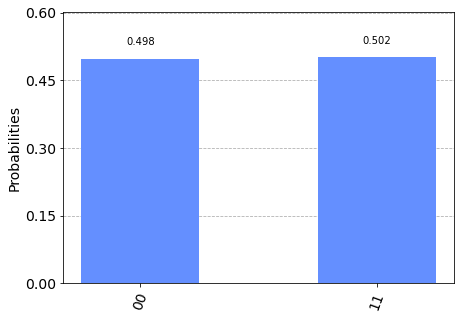

In [32]:
## Plot the histogram of results of the quantum circuit
counts_ex2_3 = execute(qc_ex2_3(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex2_3)

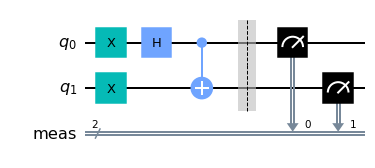

In [33]:
# Exercise 2.4)
def qc_ex2_4():
    qc = QuantumCircuit(2)
    ## FILL YOUR CODE IN HERE ##
    qc.x(0)
    qc.x(1)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure_all()
    ## ---------------------- ##
    return(qc)

## Draw the quantum circuit
qc_output = qc_ex2_4()
qc_output.draw(output = 'mpl')

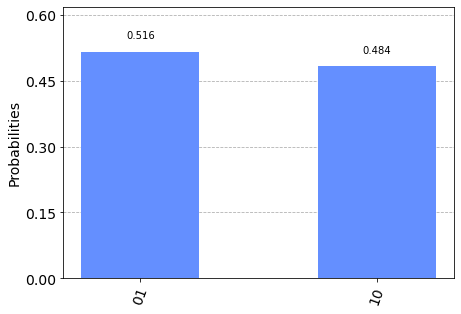

In [34]:
## Plot the histogram of results of the quantum circuit
counts_ex2_4 = execute(qc_ex2_4(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex2_4)

- Site link: [IBM Quantum Composer](https://quantum-computing.ibm.com/composer)
- You can quickly make a quantum circuit using 'IMB-Q Composer' and its resulting amplitudes, and the probabilities of the state created by the quantum circuit.
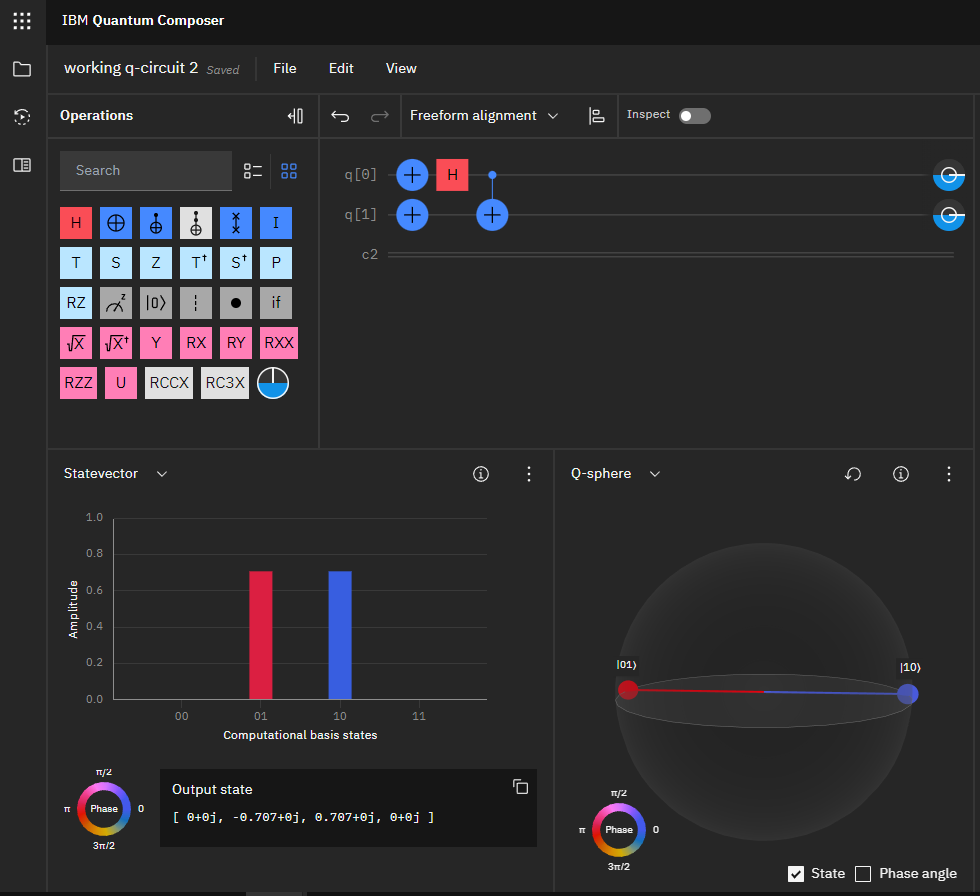

## Exercise 3
- Design quantum circuits that create the following 3-qubit entangled states. Draw your circuit and check your answer with the QASM simulation and by plotting the histogram of the measurement statistics. 
    
 1) GHZ state: $|GHZ\rangle = \frac{1}{\sqrt{2}}{\bigl(|000\rangle+|111\rangle\bigl)}$
 
 2) $|\psi\rangle = \alpha|000\rangle+\beta|111\rangle$, such that $|\alpha|^2 = 0.25$, and $|\beta|^2 = 0.75$.
 
     - Hint: Use the RY gate using `QuantumCircuit.ry(theta, qubit)`.
     
     - $R_{y}(\theta)= \begin{bmatrix} cos(\theta/2) & -sin(\theta/2) \\ sin(\theta/2) & cos(\theta/2)\end{bmatrix}$. 
 
 3) $|\phi\rangle = \frac{1}{\sqrt{2}}{\bigl(|010\rangle-|101\rangle\bigl)}$
 
     - Hint: Use the GHZ state.
 
 4) $|\omega\rangle = \frac{1}{2}{\bigl(|000\rangle+|010\rangle+|100\rangle+|111\rangle\bigl)}$
 
     - Hint: Use Toffoli gate (also known as CCNOT gate).

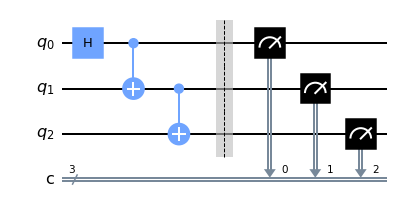

In [35]:
# Exercise 3.1)
def qc_ex3_1():
    # Create a quantum register with 3 qubits
    q3 = QuantumRegister(3, 'q')
    # Create a classical register with 3 bits
    c3 = ClassicalRegister(3, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q3, c3)
    ## FILL YOUR CODE IN HERE ##
    qc.h(0)
    qc.cx(0,1)
    qc.cx(1,2)
    qc.barrier()
    qc.measure(q3, c3)   
    ## ---------------------- ##
    return(qc)

# Draw the quantum circuit in a different style
qc_ex3_1().draw(output='mpl')

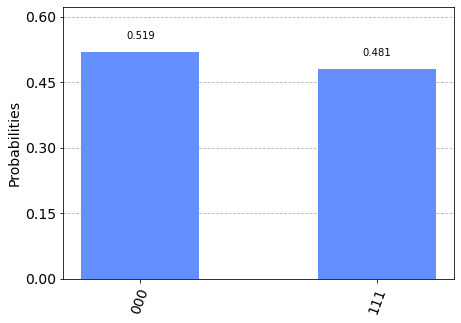

In [36]:
## Plot the histogram of results of the quantum circuit
counts_ex3_1 = execute(qc_ex3_1(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex3_1)

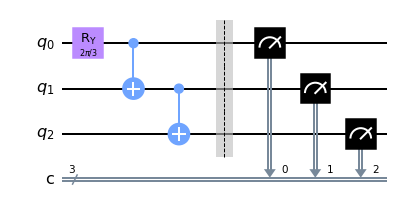

In [37]:
# Exercise 3.2)
def qc_ex3_2():
    # Create a quantum register with 3 qubits
    q3 = QuantumRegister(3, 'q')
    # Create a classical register with 3 cbits
    c3 = ClassicalRegister(3, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q3, c3)
    ## FILL YOUR CODE IN HERE ##
    qc.ry(2*pi/3, 0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.barrier()
    qc.measure(q3, c3)   
    ## ---------------------- ##
    return(qc)

# Draw the quantum circuit in a different style
qc_ex3_2().draw(output='mpl')

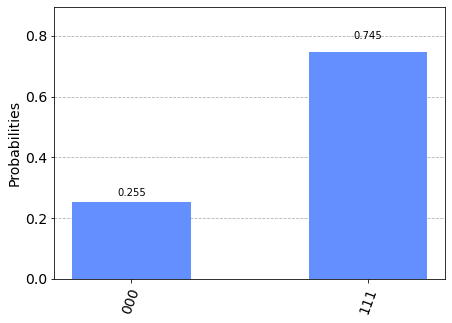

In [38]:
## Plot the histogram of results of the quantum circuit
backend_q = Aer.get_backend('qasm_simulator')
counts_ex3_2 = execute(qc_ex3_2(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex3_2)

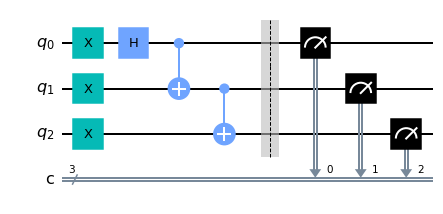

In [39]:
# Exercise 3.3)
def qc_ex3_3():
    # Create a quantum register with 3 qubits
    q3 = QuantumRegister(3, 'q')
    # Create a classical register with 3 bits
    c3 = ClassicalRegister(3, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q3, c3)
    ## FILL YOUR CODE IN HERE ##
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.h(0)
    qc.cx(0,1)
    qc.cx(1,2)
    qc.barrier()
    qc.measure(q3, c3)   
    ## ---------------------- ##
    return(qc)

# Draw the quantum circuit in a different style
qc_ex3_3().draw(output='mpl')

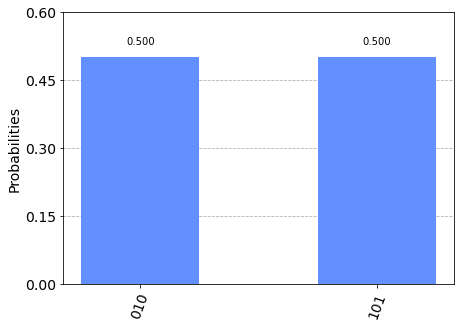

In [40]:
## Plot the histogram of results of the quantum circuit
counts_ex3_3 = execute(qc_ex3_3(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex3_3)

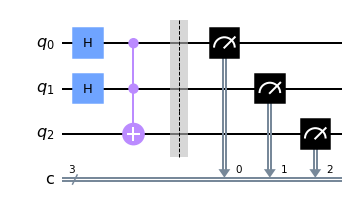

In [41]:
# Exercise 3.4)
def qc_ex3_4():
    # Create a quantum register with 3 qubits
    q3 = QuantumRegister(3, 'q')
    # Create a classical register with 3 cbits
    c3 = ClassicalRegister(3, 'c')
    
    # Create the quantum circuit with the given qubits/cbits
    qc = QuantumCircuit(q3, c3)
    ## FILL YOUR CODE IN HERE ##
    qc.h(0)
    qc.h(1)
    qc.toffoli(control_qubit1 = 0, control_qubit2 = 1, target_qubit = 2)
    qc.barrier()
    qc.measure(q3, c3)   
    ## ---------------------- ##
    return(qc)

# Draw the quantum circuit in a different style
qc_ex3_4().draw(output='mpl')

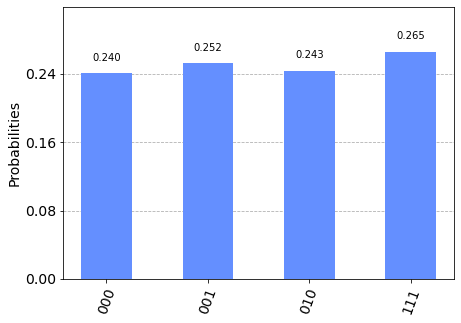

In [42]:
## Plot the histogram of results of the quantum circuit
counts_ex3_4 = execute(qc_ex3_4(), backend_q, shots=1024).result().get_counts()
plot_histogram(counts_ex3_4)

## Connecting to IMB Q device (cloud quantum computer)
- In order to use the cloud quantum device, we need to have an account at 'IMB Quantum'
    - Link: [IMB Quantum](https://quantum-computing.ibm.com/)
- Also, check the list of available quantum devices, and its system status, the number of pending job, and etc.
    - Link: [Qiskit: Compute Resourses](https://quantum-computing.ibm.com/services/)
- Using the cloud quantum device may take a long time depending on the number of its pending jobs.

In [43]:
from qiskit import IBMQ
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [44]:
# IBMQ.save_account(TOKEN)
# provider = IBMQ.load_account()
provider = IBMQ.load_account() # Load account from disk

In [45]:
# Retrieve IBM Quantum device information and the system status
backend_overview()

ibm_washington               ibm_perth                    ibm_auckland
--------------               ---------                    ------------
Num. Qubits:  127            Num. Qubits:  7              Num. Qubits:  27
Pending Jobs: 7              Pending Jobs: 27             Pending Jobs: 17
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      103.2          Avg. T1:      164.3          Avg. T1:      164.1
Avg. T2:      97.5           Avg. T2:      127.1          Avg. T2:      134.1



ibm_cairo                    ibm_lagos                    ibm_hanoi
---------                    ---------                    ---------
Num. Qubits:  27             Num. Qubits:  7              Num. Qubits:  27
Pending Jobs: 18             Pending Jobs: 29             Pending Jobs: 1548
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [46]:
# Let's get two quantum devices as an example
backend_qt = provider.get_backend('ibmq_quito')
backend_nai = provider.get_backend('ibm_nairobi')

In [47]:
# Let's see the configuration of the quantum device
backend_monitor(backend_qt)

ibmq_quito
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 19
    backend_version: 1.1.32
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    dt: 0.2222222222222222
    measure_esp_enabled: False
    memory: True
    max_shots: 20000
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}]]
    allow_object_storage: True
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    url: None
    description: 5 qubit device Quito
    meas_lo_range: [[6.807868157000001, 7.807868157000001], [6.7292695270000005, 7.7292695270000005], [6.991060108, 7.991060108], [6.8547510460000005, 7.8547510460000005], [6.904365522000001, 7.904365522000001]]
    sample_name: family: Falcon,

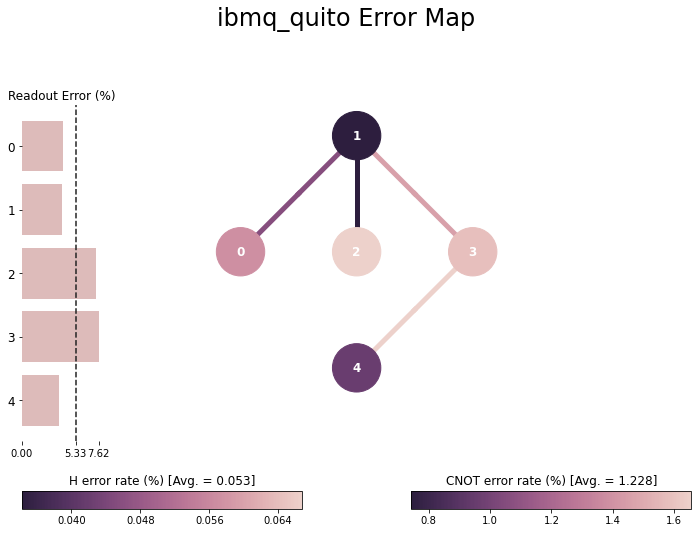

In [48]:
# Let's plot the error map of the quantum device
plot_error_map(backend_qt)

In [49]:
# Let's see the configuration of the quantum device
backend_monitor(backend_nai)

ibm_nairobi
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: active
    pending_jobs: 32
    backend_version: 1.0.21
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    dt: 0.2222222222222222
    measure_esp_enabled: False
    memory: True
    max_shots: 20000
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 6, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}]]
    allow_object_storage: True
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]]
    url: None
    description: 7 qubit device
    meas_lo_range: [[6.692252553, 7.692252553], [6.628685982, 7.628685982], [6.875559376, 7.875559376

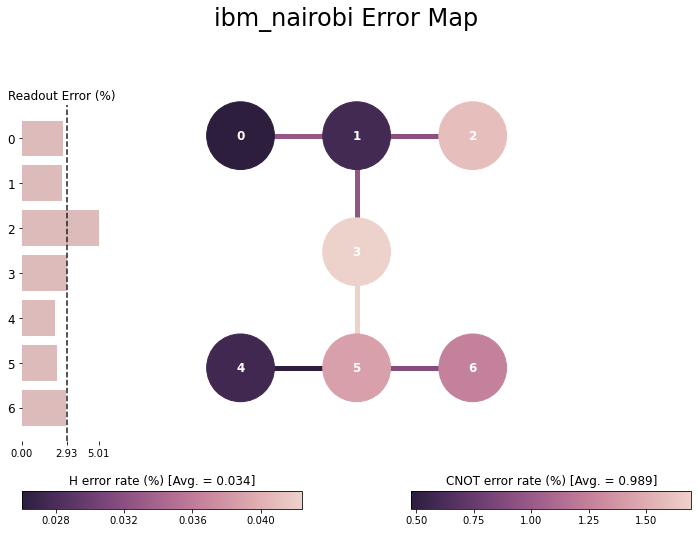

In [50]:
# Let's plot the error map of the quantum device
plot_error_map(backend_nai, figsize=(12, 9))

### Experimenting with the real quantum device
- Now let's run it on a real IMB Q device.
- Let's create a 5-qubit GHZ state, i.e. $\frac{1}{\sqrt{2}}(|00000\rangle + |11111\rangle)$.

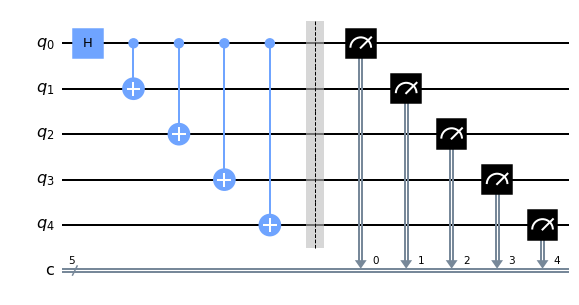

In [51]:
# Create a 5-qubit GHZ state (i.e. (|00000> + |11111>)/sqrt(2))
q5 = QuantumRegister(5,'q')
c5 = ClassicalRegister(5,'c')

ghz5= QuantumCircuit(q5,c5)
ghz5.h(0)
for i in range(1,5):
    ghz5.cx(0,i)

ghz5.barrier()
ghz5.measure(q5,c5)
ghz5.draw(output='mpl')

In [52]:
# Run the 5-qubit GHZ experiment on a 5-qubit device (try vigo)
job_exp1 = execute(ghz5, backend=backend_qt, shots=4096)
job_monitor(job_exp1)

Job Status: job has successfully run


In [53]:
# Grab experimental results
result_qt = job_exp1.result()
counts_qt = result_qt.get_counts(ghz5)

In [54]:
# Let's also try the same experiment on the 15-qubit device.
job_exp2 = execute(ghz5, backend=backend_nai, shots=4096)
job_monitor(job_exp2)

Job Status: job has successfully run


In [55]:
# Grab experimental results
result_nai = job_exp2.result()
counts_nai = result_nai.get_counts(ghz5)

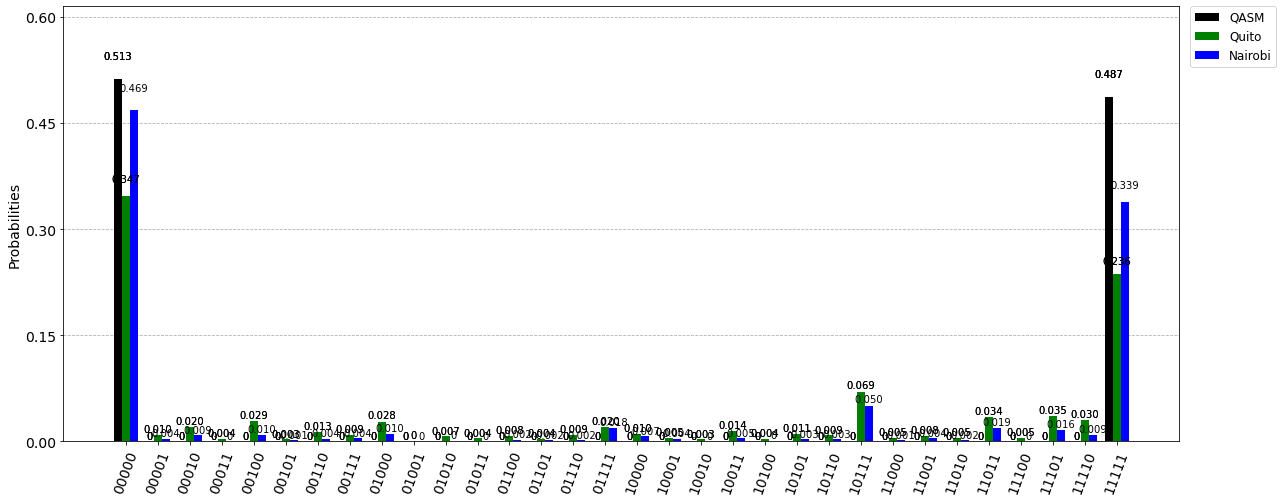

In [56]:
# Now, compare to theory by running it on qasm_simulator
job_qasm = execute(ghz5,backend=backend_q)
result_qasm = job_qasm.result()
counts_qasm = result_qasm.get_counts(ghz5)

# Plot both experimental and ideal results
plot_histogram([counts_qasm, counts_qt, counts_nai],
               color=['black','green','blue'],
               legend=['QASM','Quito','Nairobi'],figsize = [20,8])